In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Lab 5: Intro to Visualization

#### Learning objects

In this notebook, you will learn about:

- How to explore datasets
- How to prepare data to be visualizaed
- The purpose of different visualizations 
- How to create and code visualizations
- How to analyze and draw insights from visualizations

#### Helpful Data Science Resources 
Here are some resources you can check out while doing this notebook and to explore data visualization further!
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/07/Visualization.html) - Visualization chapter
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Cool Data Visualizations](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

**A note on the autograder for this lab:** The test cases in the autograder are not comprehensive -- you can create some completely incorrect graph while passing the autograder. So assure yourself that you are making the correct visualizations, we have provided a [list of reference images](https://www.econ148.org/sp23/resources/assets/supp_materials/lab05/reference_images/). Your score for this lab will still solely depend on the autograder provided. 

---
## Part 1: Explorative Data Analysis (EDA)

### Unemployment rate and NaN values 

Let's start off with loading in the dataset. We will be using unemployment rate data from Fred. 

**Question 1.1:** Load in the dataset `data/unemployment_rate.csv` and read it into a Pandas dataframe. Name it `unemployment_df`.

In [10]:
unemployment_df = pd.read_csv("data/unemployment_rate.csv")
unemployment_df.head()

,DATE,LNS14000001,LNS14000002,UNRATE
0,1954/4/1,5.6,6.4,5.9
1,1954/5/1,5.7,6.3,5.9
2,1954/6/1,5.3,6.2,5.6
3,1954/7/1,5.6,6.3,5.8
4,1954/8/1,6.0,6.2,6.0


In [11]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** The dataset contains three columns: the overall unemployment rate, unemployment rate for male, and unemployment rate for female. See [Fed website](https://fred.stlouisfed.org/graph/?g=jXvf) and [Pandas Documentation](https://pandas.pydata.org/docs/refeence/api/pandas.DataFrame.rename.html) and change names of the columns to one of these : 'Date', 'Male', 'Female', and 'Unemployment rate'. 

In [12]:
unemployment_df = unemployment_df.rename(columns={"DATE": "Date", "LNS14000001": "Male", "LNS14000002": "Female", "UNRATE": "Unemployment rate"})
unemployment_df.head()

,Date,Male,Female,Unemployment rate
0,1954/4/1,5.6,6.4,5.9
1,1954/5/1,5.7,6.3,5.9
2,1954/6/1,5.3,6.2,5.6
3,1954/7/1,5.6,6.3,5.8
4,1954/8/1,6.0,6.2,6.0


In [13]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In [14]:
unemployment_df.isnull().values.any()

False

Before plotting the data, it is important to determine if there are any nan values in the dataset. 
You can use [pd.isnull](https://pandas.pydata.org/docs/reference/api/pandas.isna.html) or [pd.isna](https://pandas.pydata.org/docs/reference/api/pandas.isna.html) to check the existence of nan value. 

Take a look at documentation and use the knowledge to determine whether our dataset contains any NaN value. 

<!-- BEGIN QUESTION -->

**Question 1.3:**  Does the dataset contain any NaN values? Explain what you did to reach your conclusion. 

I just checked if there were any NaN values in the df. It returned false, so there aren't any.

<!-- END QUESTION -->

---
## Part 2: Data Visualization

### Line Plots

A line plot is used to display data as a series of points connected by a line. It's generally used to visualize how a variable changes over time (also known as [time series data](https://www.investopedia.com/terms/t/timeseries.asp)). It has a time-related variable on the x-axis (minutes, days, months, years, etc.) and a numerical variable on the y-axis.

Let's create a line plot to see how the overall unemployment rate changes over the years.


**Question 2.1:** Make a line plot for the overall unemployment rate over the entire sample period. Label your plot properly (both axes and title).  

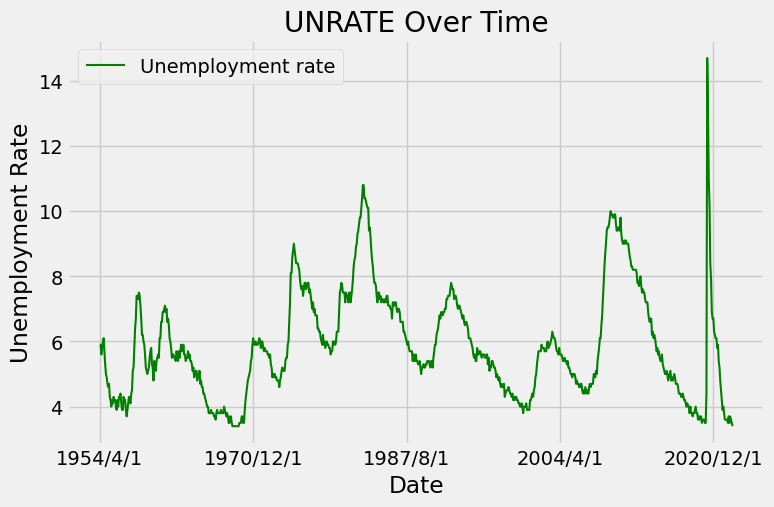

In [15]:
def q2_1():
    unemployment_df.plot("Date", "Unemployment rate", figsize=(8,5), style='g-', linewidth= 1.5)
    plt.ylabel("Unemployment Rate")
    plt.xlabel("Date")
    plt.title("UNRATE Over Time")
q2_1()

In [16]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2:** What kind of trend in unemployment rate can you find from the graph above? Please provide potential reasonings of the trend you find from the graph above. 

The only pattern I see is that when there is a sharp increase in the rate, there is a sharp decrease right after.

<!-- END QUESTION -->

**Question 2.3:** Create similar line plots for the `unemployment_rate` dataset below **for each gender**. Label your plot properly (both axes and title).

Hint : Take a look at documentation of [df.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method.

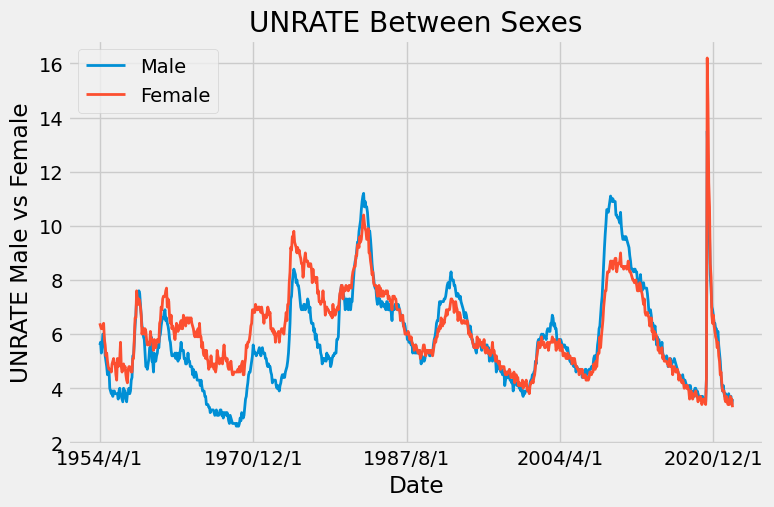

In [17]:
def q2_3():
    unemployment_df.plot("Date", ["Male", "Female"], figsize=(8, 5), linewidth=2)
    plt.ylabel("UNRATE Male vs Female")
    plt.xlabel("Date")
    plt.title("UNRATE Between Sexes")
q2_3()

In [18]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.4:** What kind of difference between two genders can you see from the plot above? What could be the possible reasons behind this difference? 

I do not see much of a difference. It began to even out more as time continued.

<!-- END QUESTION -->

### Inflation and Unemployment rate

Now we will be using both Unemployment rate and Inflation rate at the same time to plot a graph. First let's create `inflation_df` using `inflation_rate.csv`. Let's import the dataframe and rename columns so we can use them to plot graph.  

**Question 2.5**: Load in the dataset `data/inflation_rate.csv` and read it into a Pandas dataframe. Name it `inflation_df`. Then rename the columns to `Date` and `Inflation rate`. 

In [19]:
inflation_df = pd.read_csv("data/inflation_rate.csv")
inflation_df = inflation_df.rename(columns={"DATE": "Date", "CPIAUCSL_PC1": "Inflation rate"})
inflation_df.head()

,Date,Inflation rate
0,1948/1/1,7.67221
1,1949/1/1,-0.98080
2,1950/1/1,1.06402
3,1951/1/1,7.94113
4,1952/1/1,2.28439


In [20]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Merging datasets

It makes easier to plot if we have a single dataframe to plot. There are many plotting libraries that require you to pass the dataframe of your interest as one of arguments. Threrefore, we will create a Dataframe that contains both `unemployment_rate` and `inflation_rate`. We can use `Date` column of both dataframe as a key to combine two tables. 

We want to create `merged_df` without any row containing NaN value. In other words, keep rows that only exsit in both dataframe.

**Question 2.6**: Create `merged_df` by inner merging `unemployment_df` and `inflation_df`. 

Hint: Read documentation of [pd.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html). Think about what type of merge you want to use. 

In [21]:
merged_df = unemployment_df.merge(inflation_df, on="Date")
merged_df.head()

,Date,Male,Female,Unemployment rate,Inflation rate
0,1955/1/1,4.8,5.3,4.9,-0.25746
1,1956/1/1,3.8,4.5,4.0,1.47411
2,1957/1/1,3.9,4.8,4.2,3.39269
3,1958/1/1,5.7,5.9,5.8,2.73002
4,1959/1/1,5.9,6.2,6.0,0.93199


In [22]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Now, lets create a plot using the dataframe we just created. This time we will be using `plt.plot()` method to plot multiple graphs into a single plot. Feel free to read documentatioon of [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and fill in `...` to create the plot.

**Question 2.7**: Fill in the blanks to plot two line graphs for both Inflation rate and Unemployment rate and label their names using respectively. Please set the name of x and y label to `Date` and `Percentage (%)`. Label your plot properly (both axes and title).

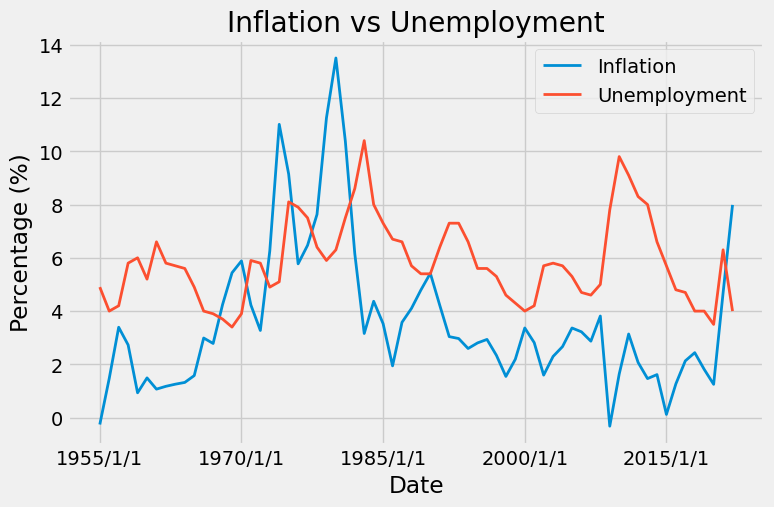

In [32]:
def q2_7():
    fig, ax = plt.subplots(figsize=(8,5), dpi=100)

    ax.plot(merged_df["Date"], merged_df["Inflation rate"], label="Inflation", linewidth=2) # inflation
    ax.plot(merged_df["Date"], merged_df["Unemployment rate"], label="Unemployment", linewidth=2) # unemployment

    ticks = merged_df["Date"].loc[range(0,len(merged_df["Date"]), 15)].values # this will create ticks on the x-axis
    plt.xticks(ticks)
    
    plt.xlabel("Date") # label your plot
    plt.ylabel("Percentage (%)")
    plt.title("Inflation vs Unemployment") 

    plt.legend()
q2_7()

In [33]:
grader.check("q2_7")

q2_7 results: All test cases passed!

### Bar Charts

Another visualization we can use to see how the time spent on each activity changes over the years is a bar chart. **A bar chart is used to visualize the distribution of a categorical variable.** The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category where the bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category. 

In this case, we don't have categorical variable in our both datasets. However, if we create an extra column that only takes integer value from both `inflation_rate` and `unemployment_rate` columns and plot a bar chart using the column, we can get the distribution that looks the same as the distribution of histogram. 

### Histograms

**A histogram allows you to visualize the distribution of a numerical variable.** It helps you understand how spread out the values in your table are. A histogram is a visualization of the distribution of a quantitative variable. It looks very much like a bar chart but there are some **important differences** that we will examine in this section.

Histograms follow the **area principle** and have two defining properties:

1. The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.
1. The area of each bar is proportional to the number of entries in the bin.

The histogram is said to be drawn on the *density scale*. The area of each bar is equal to the percent of data values that are in the corresponding bin.

> **`.hist`**: create a histogram (specify the name of the column, plus other optional arguments)
\

**Question 2.8**: Plot histogram for inflation rate using `.hist()` method. Create `bins` array for histogram from 3 to 15 with stepsize of 1.5. Label the axes to `Inflation rate (%)` and `Counts` and name the title of the plot `Distribution of Inflation rate (%)`. 

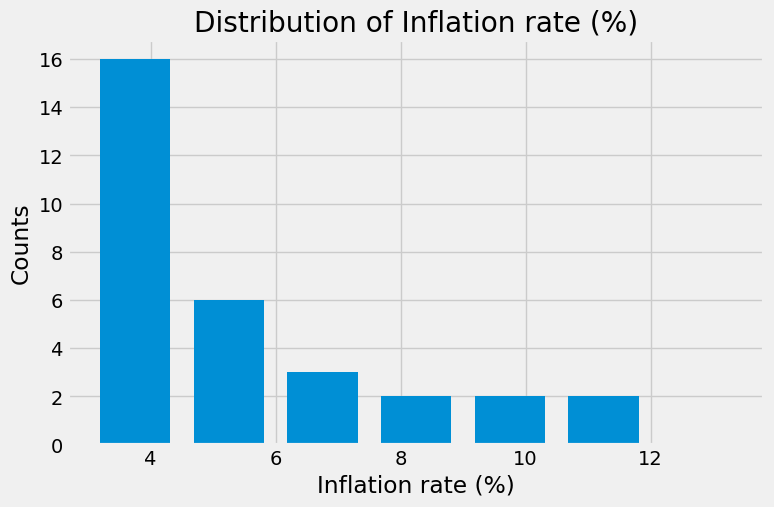

In [39]:
def q2_8():
    fig, ax = plt.subplots(figsize =(8, 5), dpi=100)

    bins = np.arange(3, 15, 1.5)
    ax.hist(x=merged_df["Inflation rate"], bins=bins, rwidth=.75)
    plt.xlabel("Inflation rate (%)")
    plt.ylabel("Counts")
    plt.title("Distribution of Inflation rate (%)")# label your plot
q2_8()

In [40]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9**: Plot histogram for Unemployment rate using .hist() method. Create `bins` array for histogram from 3 to 11 with stepsize of 0.5. Label the axes `Unemployment rate (%)` and `Counts` and name the title of the plot as `Distribution of Unemployment rate (%)`.

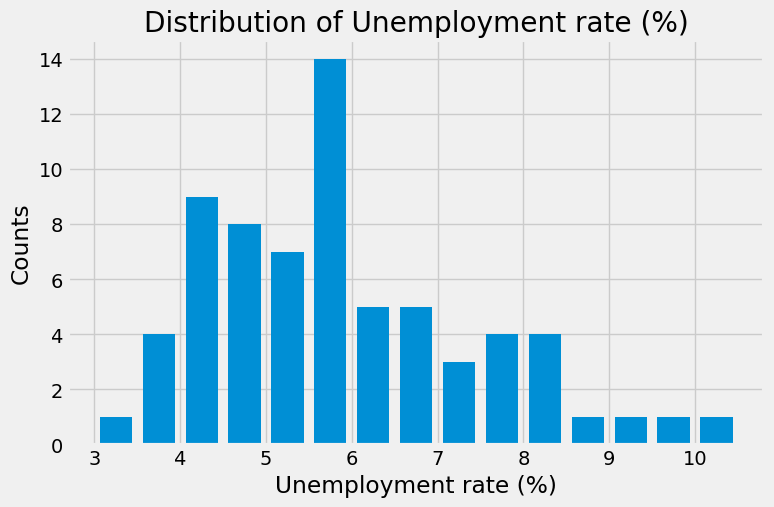

In [41]:
def q2_9():
    fig, ax = plt.subplots(figsize =(8, 5), dpi=100)

    bins = np.arange(3, 11, 0.5)
    ax.hist(x=merged_df["Unemployment rate"], bins=bins, rwidth=.75)
    plt.xlabel("Unemployment rate (%)")
    plt.ylabel("Counts")
    plt.title("Distribution of Unemployment rate (%)") # label your plot
q2_9()

In [42]:
grader.check("q2_9")

q2_9 results: All test cases passed!

### Scatter Plots

Another type of data visualization that is really important in statistics is the scatter plot. **Scatter plots are used to visualize the relationship between two numerical variables.**

Specifically, it allows us to infer the association between two variables. Association refers to how one variable (the y-variable) changes with respect to the other variable (the x-variable). See [this chapter](https://inferentialthinking.com/chapters/15/Prediction.html) in the DATA 8 textbook for reference.

We can describe the association between two variables based on two factors:

1. Magnitude: Is the association strong or weak? If the points on the scatter plot all line up along a straight line (in any direction) or "blob", it means that the association between the variables is strong. On the other hand, if the points are all spread out, it means that the association is weak.

2. Direction (or sign): Is the association positive or negative? If the points on the scatter plot line up along an upward sloping line, it means that the association between the variable is positive. If they line up along a downward sloping line, the association is negative.

Now that we understand what scatter plots are and how to interpret them, let's create one to visualize the association between Unemployment rate and Inflation rate.

> **`.scatter`:** create a scatter plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)


**Question 2.10** Create a scatter plot using `Unemployment rate` for x-axis and `Inflation rate` for y-axis. Also draw a linear line of the best fit with color red using `slope` and `intercept` returned from [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). 

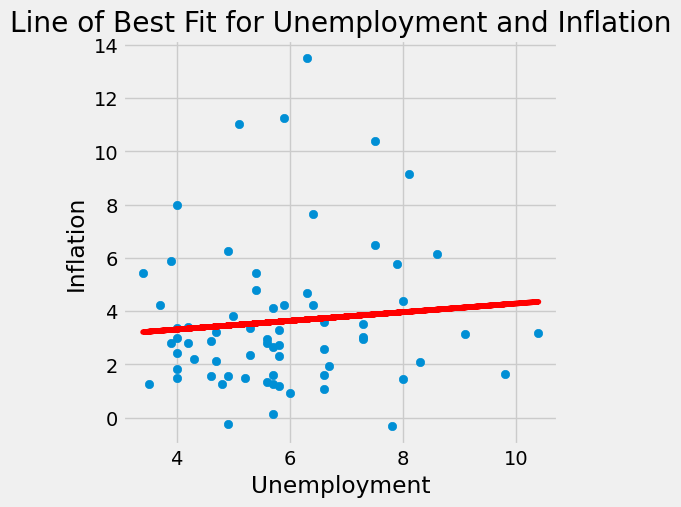

In [59]:
def q2_10():
    fig, ax = plt.subplots(figsize =(5, 5), dpi=100)

    x = merged_df["Unemployment rate"]
    y = merged_df["Inflation rate"]

    ax.scatter(x, y)

    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(x, y, 1)

    #use red as color for regression line (line of the best fit)
    plt.plot(x, m*x+b, color="red")

    plt.xlabel("Unemployment")
    plt.ylabel("Inflation")
    plt.title("Line of Best Fit for Unemployment and Inflation") # label your plot
q2_10()

In [60]:
grader.check("q2_10")

q2_10 results: All test cases passed!

### Philips curve

The ***Phillips Curve*** is an economic concept that shows the relationship between inflation and unemployment. It suggests that there is an inverse relationship between these two variables, meaning that as unemployment decreases, inflation increases, and vice versa. The curve is based on the idea that as the labor market tightens, employers must offer higher wages to attract workers, which increases production costs and leads to higher prices for goods and services. 

You can get more information about the Philips curve [here](https://en.wikipedia.org/wiki/Phillips_curve)



One of reasons why our regrassion line above was not downward sloping is because we have too broad time frame with small number of data points for each year. Lets categorize each data point repective to decades. You can do this by simply creating extra column with column name `Decade` and assign the decade value calculated using `Date` column. 

**Question 2.11**: Create `Decade` column in `merged_df` that store the decade. 

Note: For example, 1967 should have decade as 1960, and 2021 should have decade as 2020.   
Hint: You can get part of a string by slicing a string. We can do this on a column in a dataframe using the string method. This [tutorial](https://note.nkmk.me/en/python-pandas-str-slice/) may be helpful.

In [63]:
merged_df["Decade"] = merged_df["Date"].str[:3] + '0' # hint: for example, '195' + '0'
merged_df.head()

,Date,Male,Female,Unemployment rate,Inflation rate,Decade
0,1955/1/1,4.8,5.3,4.9,-0.25746,1950
1,1956/1/1,3.8,4.5,4.0,1.47411,1950
2,1957/1/1,3.9,4.8,4.2,3.39269,1950
3,1958/1/1,5.7,5.9,5.8,2.73002,1950
4,1959/1/1,5.9,6.2,6.0,0.93199,1950


In [64]:
grader.check("q2_11")

q2_11 results: All test cases passed!

Now we will use the [seaborn](https://seaborn.pydata.org/index.html) package to create a scatter plot using the same data above but with different colors based on the `Decade` column. Read documentation of [`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to create a scatter plot with different colors based on `Deceade`. Still we want to have unemployment rate on the x-axis and inflation rate on the y-axis.

**Question 2.12**: Fill in the `...` to create a scatter plot of our interest. Also, label your plot properly (both axes and title). 

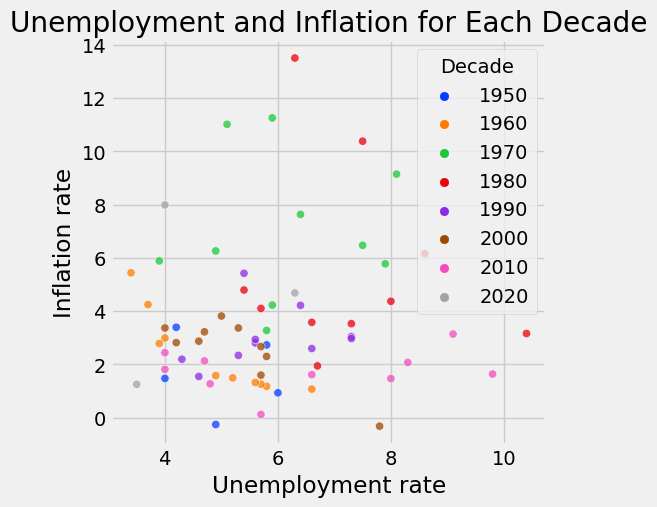

In [67]:
def q2_12():
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

    sns.scatterplot(x="Unemployment rate", y="Inflation rate", data=merged_df, hue="Decade", palette="bright", alpha=0.75)

    plt.xlabel("Unemployment rate")
    plt.ylabel("Inflation rate")
    plt.title("Unemployment and Inflation for Each Decade")# label your plot
q2_12()

In [68]:
grader.check("q2_12")

q2_12 results: All test cases passed!

Although it is possible to use the `np.polyfit()` and `plt.plot()` to graph the regression line, we will be introducing new plot `sns.lmplot` from Seabon library. This is a powerful tool in the sense that use can create and color the scatter plot and regression lines based on the categorical column of your choice at the same time. Read the documentation of [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) for more information.

**Question 2.13**: Fill in the `...` to create a `lmplot` of our interest. Use `Unemployment rate` and `Inflation rate` from `merged_df_without_20s` to create a plot with their color based on `Decade` column. Also, label both x-axis and y-axis of the plot and title the plot as same as above. 

Note: As the decade `2020` has only three data points, please create `merged_df_without_20s` filtering out data in the decade `2020`.  

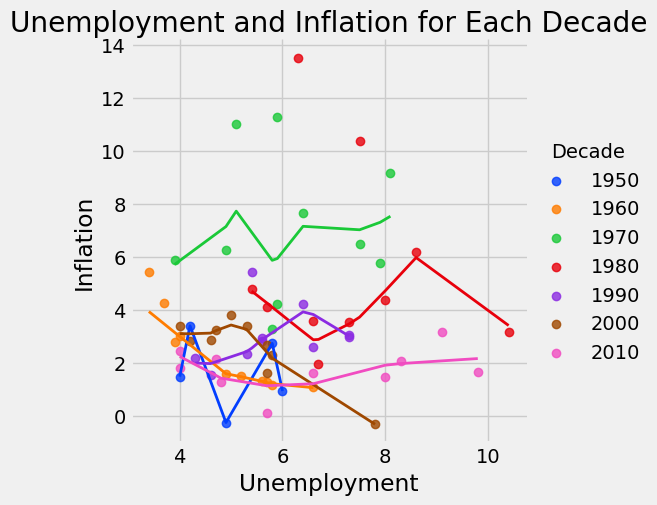

In [72]:
def q2_13():
    merged_df_without_20s = merged_df[merged_df["Decade"] != "2020"]

    sns.lmplot(x="Unemployment rate", y="Inflation rate", data=merged_df_without_20s, hue="Decade", 
            palette="bright", ci=None, line_kws={'lw': 2}, lowess =True)

    plt.xlabel("Unemployment")
    plt.ylabel("Inflation")
    plt.title("Unemployment and Inflation for Each Decade") # label your plot
    return merged_df_without_20s
_ = q2_13()

In [73]:
grader.check("q2_13")

q2_13 results: All test cases passed!

---
## Part 3. More Plots with Seaborn

### Boxplot

A boxplot is similar to a histogram as it also **visualizes the distribution of a numerical variable, but it gives you more specific statistics about the distribution**: the minimum, lower quartile (value at the bottom 25th percentile), median (value at the 50th percentile), upper quartile (value at the top 25th percentile) and maximum. [Read here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for information about box plots.


**Question 3.1**: Use [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) on `unemployment_df` to create a box plot of three different unemployment rates: `Male`, `Unemployment rate`, and `Female`. Title the plot as `Distribution of Unemployment rates (%)` and label y-axs as `Unemployment rate (%)`

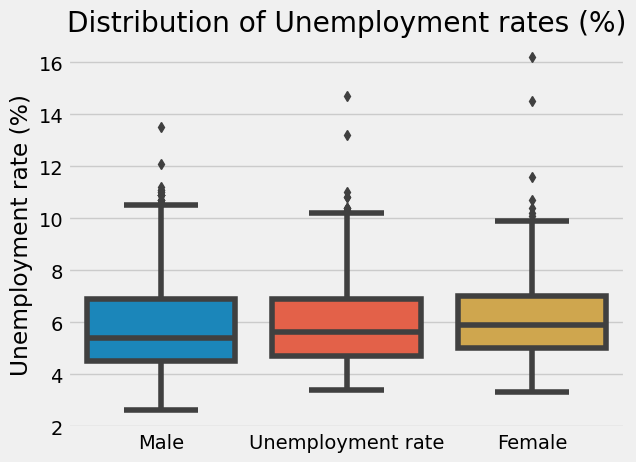

In [75]:
def q3_1():
    sns.boxplot(data=unemployment_df[["Male", "Unemployment rate",  "Female"]])
    plt.ylabel("Unemployment rate (%)")
    plt.title("Distribution of Unemployment rates (%)")# label your plot
q3_1()

In [76]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.2**: Use the boxplot above to find *approximate* values for the following statistics for the Unemployment rate (overall, female, and male). 
- **Minimum**: ...
- **Lower quartile**: ...
- **Median**: ...
- **Upper quartile**: ...
- **Maximum**: ...

Minimum: 2.8
Lower quartile: 4.5
Median: 5.4
Upper quartile: 6.8
Maximum: 16.2

<!-- END QUESTION -->

### Violin Plot

A violin plot is a combination of a histogram and boxplot. **It shows you the general distribution of the data (by creating a histogram and drawing a line to capture its general shape) as well as specific statistics (same as the ones a boxplot shows).** [Read here](https://chartio.com/learn/charts/violin-plot-complete-guide/) for information about violin plots.

**Question 3.3**: Use [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) on `merged_df` to create a violin plot of `Unemploymnet rate` and `Inflation rate`.  Set the palette argument of the violin plot to `prism`. Also, title the plot as `Distribution of Inflation rate & Unemployment rate` and label y-axis as `Percentage (%)`.

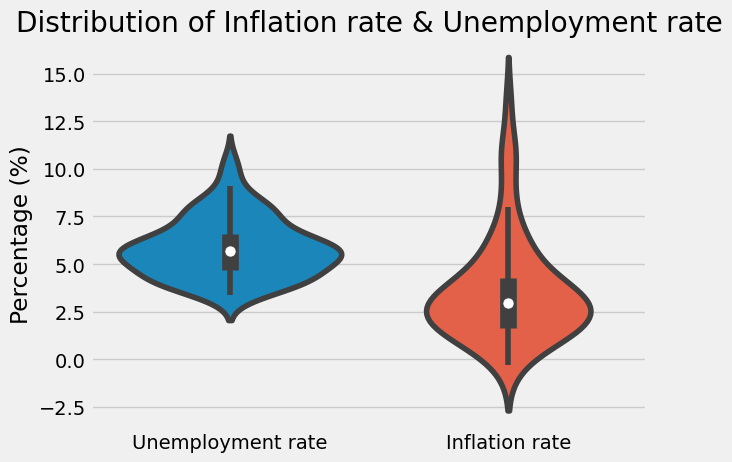

In [78]:
def q3_3():
    sns.violinplot(data=merged_df[["Unemployment rate", "Inflation rate"]])
    plt.title("Distribution of Inflation rate & Unemployment rate")
    plt.ylabel("Percentage (%)")
q3_3()

In [79]:
grader.check("q3_3")

q3_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.4**: What did you notice from the violin plot above? (Distribution, skewness, etc.) Please give the reasoning to your answer.   

The distribution of Unemployment rates is much more uniform with less variation and skewness. Inflation rates see more of a right skew, as more of the data is concentrated in lower values.

<!-- END QUESTION -->

---
## Conclusion

Over the course of this notebook, you were introduced to basic manipulation and analysis of data tables that is frequently necessary in order to create visualizations. Now you've learned about different types of visualizations, practiced creating various plots, and know what visualizations are best for each goal. Feel free to reference this notebook for your Survey Analysis project.

**Congratulations!** You have finished the notebook!

---
## Feedback

**Question 4:** Please fill out this short [feedback form](https://forms.gle/4PgR9FmW37w36dR48) to let us know your thoughts about this lab! We really appreciate your opinions and feedback! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [80]:
codeword = "seaborn"

In [81]:
grader.check("q4")

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)